# Importowanie wymaganych bibliotek
Importowanie bibliotek takich jak pandas, numpy, matplotlib, seaborn oraz sklearn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Wczytywanie danych
Wczytywanie datasetu Pima Indians Diabetes z pliku CSV.

In [28]:
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(data_url, names=column_names)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Eksploracyjna analiza danych
Analiza danych, w tym wyświetlanie pierwszych kilku wierszy, sprawdzanie brakujących wartości oraz podstawowe statystyki opisowe.

<Figure size 1200x800 with 0 Axes>

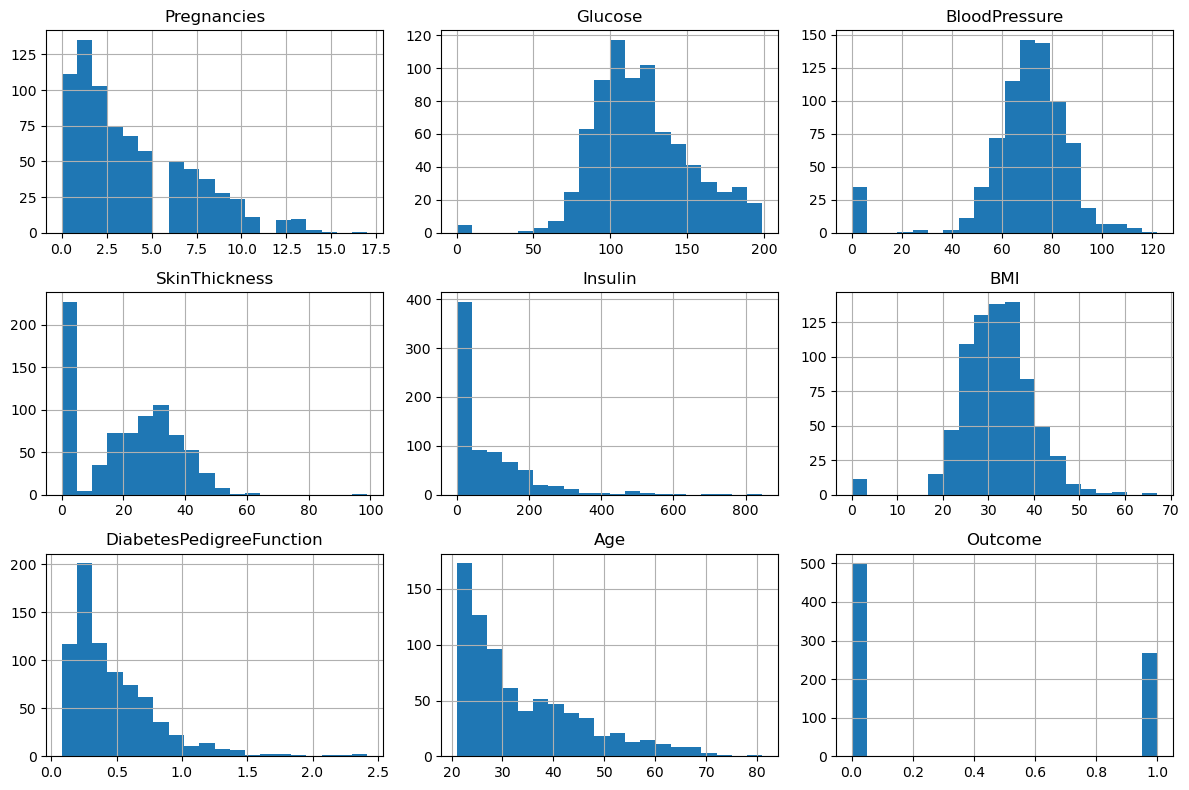

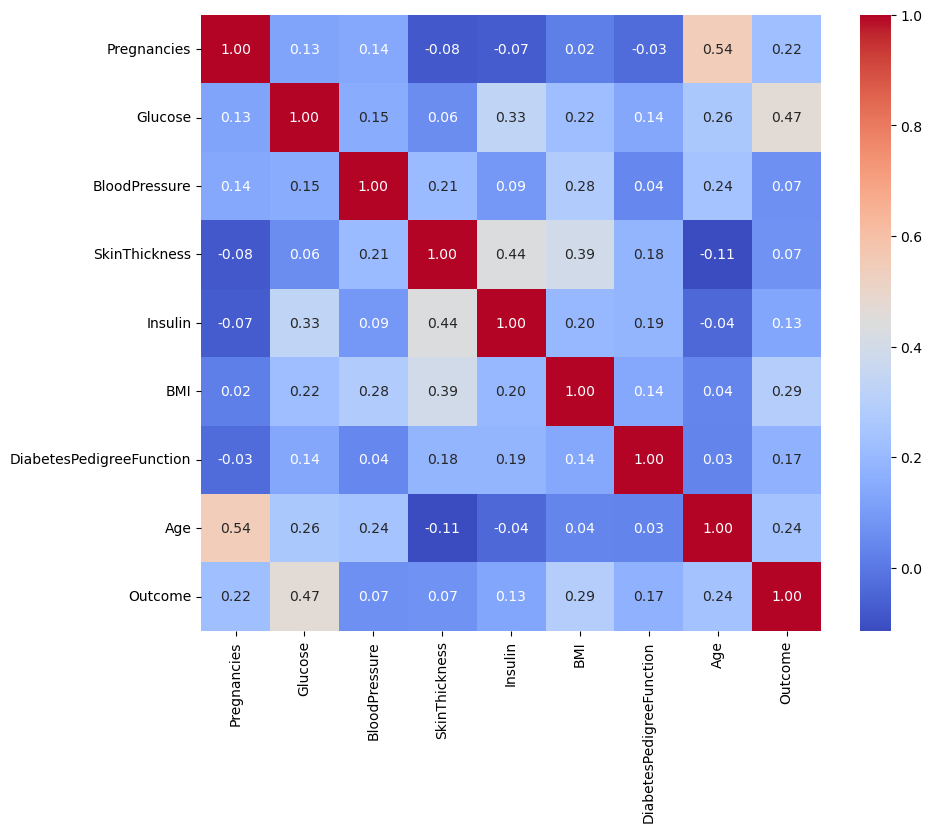

In [29]:
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Przygotowanie danych
Przygotowanie danych do modelowania, w tym normalizacja i skalowanie cech.

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Przeskalowane dane treningowe:\n", X_train_scaled[:5])
print("Przeskalowane dane testowe:\n", X_test_scaled[:5])

Przeskalowane dane treningowe:
 [[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]
Przeskalowane dane testowe:
 [[ 0.68185612 -0.71402038 -0.61712658  0.81710976  0.93474906  0.26073561
  -0.11637247  0.87809089]
 [-0.52639686 -0.27664283  0.30191569  0.7522648  -0.70120553  0.48053518
  -0.954231   -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 -1.32277365 -0.70120553 -0.15300476
  -0.9245197  -1.03594038]
 [ 1.28598261 -0.43284909  0.57222224 -1.32277365 -0.70120553 -0.95462672
   1.14932872  0.0950781 ]
 [ 0.98391937  0.47314726  1.

# Podział danych na zbiory treningowy i testowy
Podział danych na zbiory treningowy i testowy przy użyciu funkcji train_test_split z biblioteki sklearn.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Rozmiar zbioru treningowego: {X_train.shape[0]} próbek")
print(f"Rozmiar zbioru testowego: {X_test.shape[0]} próbek")

Rozmiar zbioru treningowego: 614 próbek
Rozmiar zbioru testowego: 154 próbek


# Tworzenie modelu AI
Tworzenie modelu AI przy użyciu klasyfikatora, np. LogisticRegression z biblioteki sklearn.

In [35]:
model = LogisticRegression()

model.fit(X_train_scaled, 
          y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7532467532467533


# Ewaluacja modelu
Ewaluacja modelu na zbiorze testowym, w tym obliczanie metryk takich jak accuracy, precision, recall i F1-score.

Dokładność (Accuracy): 0.75
Precyzja (Precision): 0.65
Czułość (Recall): 0.67
F1-score: 0.66


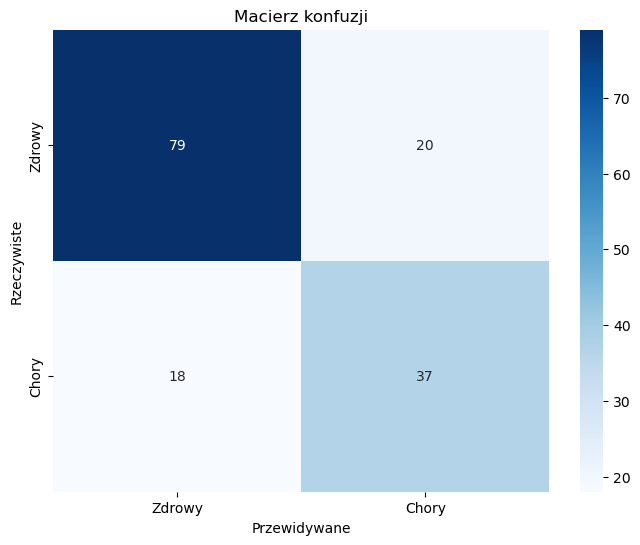

In [36]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Dokładność (Accuracy): {accuracy:.2f}")
print(f"Precyzja (Precision): {precision:.2f}")
print(f"Czułość (Recall): {recall:.2f}")
print(f"F1-score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Zdrowy', 'Chory'], yticklabels=['Zdrowy', 'Chory'])
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.title('Macierz konfuzji')
plt.show()